<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

### 0. Import packages

In [ ]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# ------------------------------------------------------
import pandas as pd
import numpy as np
import math

# Preprocesado
# ------------------------------------------------------
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, MinMaxScaler


# Visualizacion
# ------------------------------------------------------
import matplotlib.pyplot as plt

import seaborn as sns



# Funciones de soporte
# ------------------------------------------------------
import sys
sys.path.append("..")

import src.soporte_eda as se
import src.soporte_clustering as sc
import src.association_metrics as am
import src.soporte_outliers as so

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Import data

In [5]:
wrestling = pd.read_csv("../datos/WrestlingWorldTournament.csv", index_col=0)

# 2. Exploration and cleaning

In [6]:
explorador = sc.Exploracion(wrestling)
explorador.explorar_datos()

5 registros aleatorios:


,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
284,Leonard Mcninch,Male,35,189.0,Japan,107,"Judo, Karate",3,6,7,8,Consejo Global de Lucha Libre,2000,217
316,Marvin Coste,Male,29,180.0,France,93,MMA,3,8,6,7,Fight Zone Wrestling,2013,172
16,Angela Adams,Female,31,168.0,USA,85,MMA,3,6,6,7,World Wrestling Entertainment,2011,216
142,Dorothy Archer,Female,35,169.5,France,83,"Boxing, Karate",3,5,7,6,World Wrestling Entertainment,2004,359
380,Ray Pierce,Male,25,176.0,Japan,94,"Judo, Karate",2,10,7,7,Consejo Global de Lucha Libre,2011,170




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB
None


Duplicados en el DataFrame:
0


Estadísticas descriptivas de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
name,500,500,Zenaida Flagge,1
gender,500,2,Female,265
nationality,500,8,France,118
sports,500,31,Karate,42
federation,500,3,Fight Zone Wrestling,206




Número de valores nulos por columna:
name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64


Distribución de valores categóricos:

Columna: name
name
Zenaida Flagge          1
Aaron Peavy             1
Abe Rutland             1
Adrian Quinn            1
Viola Lonergan          1
                       ..
Alfred Ray              1
Alexander Bracamonte    1
Alexander Boone         1
Alex Harris             1
Albertha Rodriguez      1
Name: count, Length: 500, dtype: int64

Columna: gender
gender
Female    265
Male      235
Name: count, dtype: int64

Columna: nationality
nationality
France       118
Japan        116
USA          115
Australia     64
Egypt         42
England       26
Argentina     12
India          7
Name: count, dtype: int64

Columna: sports
sports


,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
age,1.000000,-0.001694,0.044624,-0.003731,0.016052,-0.036051,0.219514,-0.858723,-0.208136
height,-0.001694,1.000000,0.982154,0.072840,0.658785,-0.484157,0.144129,0.005482,-0.251894
weight,0.044624,0.982154,1.000000,0.071260,0.654799,-0.486668,0.157628,-0.039413,-0.257785
hours_per_day,-0.003731,0.072840,0.071260,1.000000,-0.025897,0.326623,0.275585,-0.136393,-0.458479
strength,0.016052,0.658785,0.654799,-0.025897,1.000000,-0.384900,0.116703,0.017604,-0.383859
agility,-0.036051,-0.484157,-0.486668,0.326623,-0.384900,1.000000,-0.005940,-0.054115,-0.343249
mental,0.219514,0.144129,0.157628,0.275585,0.116703,-0.005940,1.000000,-0.218854,-0.423994
year_start,-0.858723,0.005482,-0.039413,-0.136393,0.017604,-0.054115,-0.218854,1.000000,0.323980
rank,-0.208136,-0.251894,-0.257785,-0.458479,-0.383859,-0.343249,-0.423994,0.323980,1.000000


No hay duplicados ni valores nulos evidentes en el dataframe. Se asume que con nombres diferentes se trata de personas diferentes, así que no se exploran duplicados por subsets de variables, excluyendo el nombre por ejemplo.

# 3. EDA

## 3.1 EDA univariante

Ploteamos en primer lugar las distribuciones de las variables numéricas.

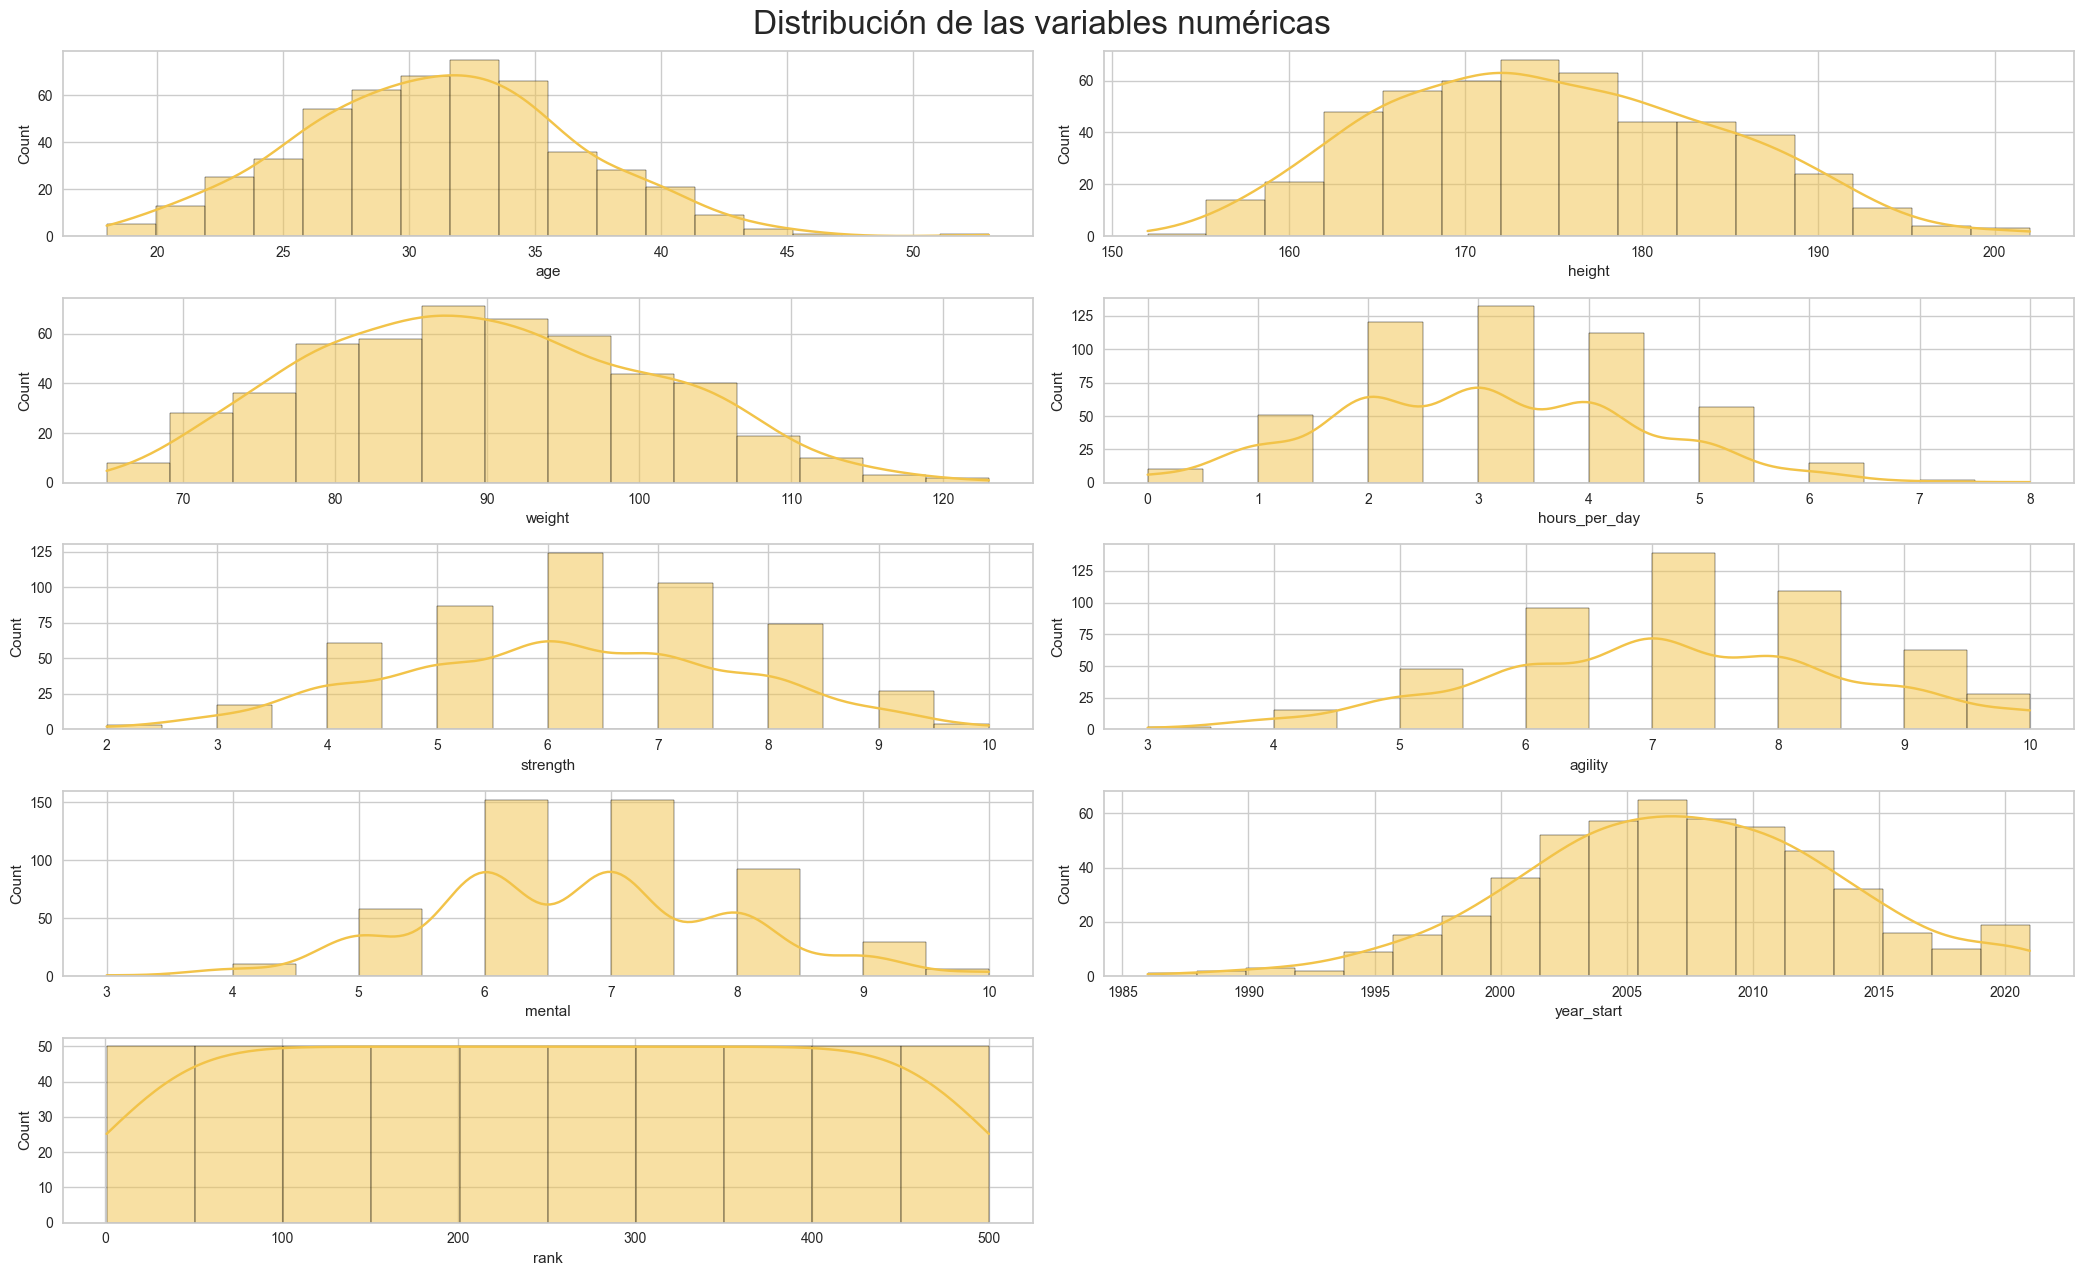

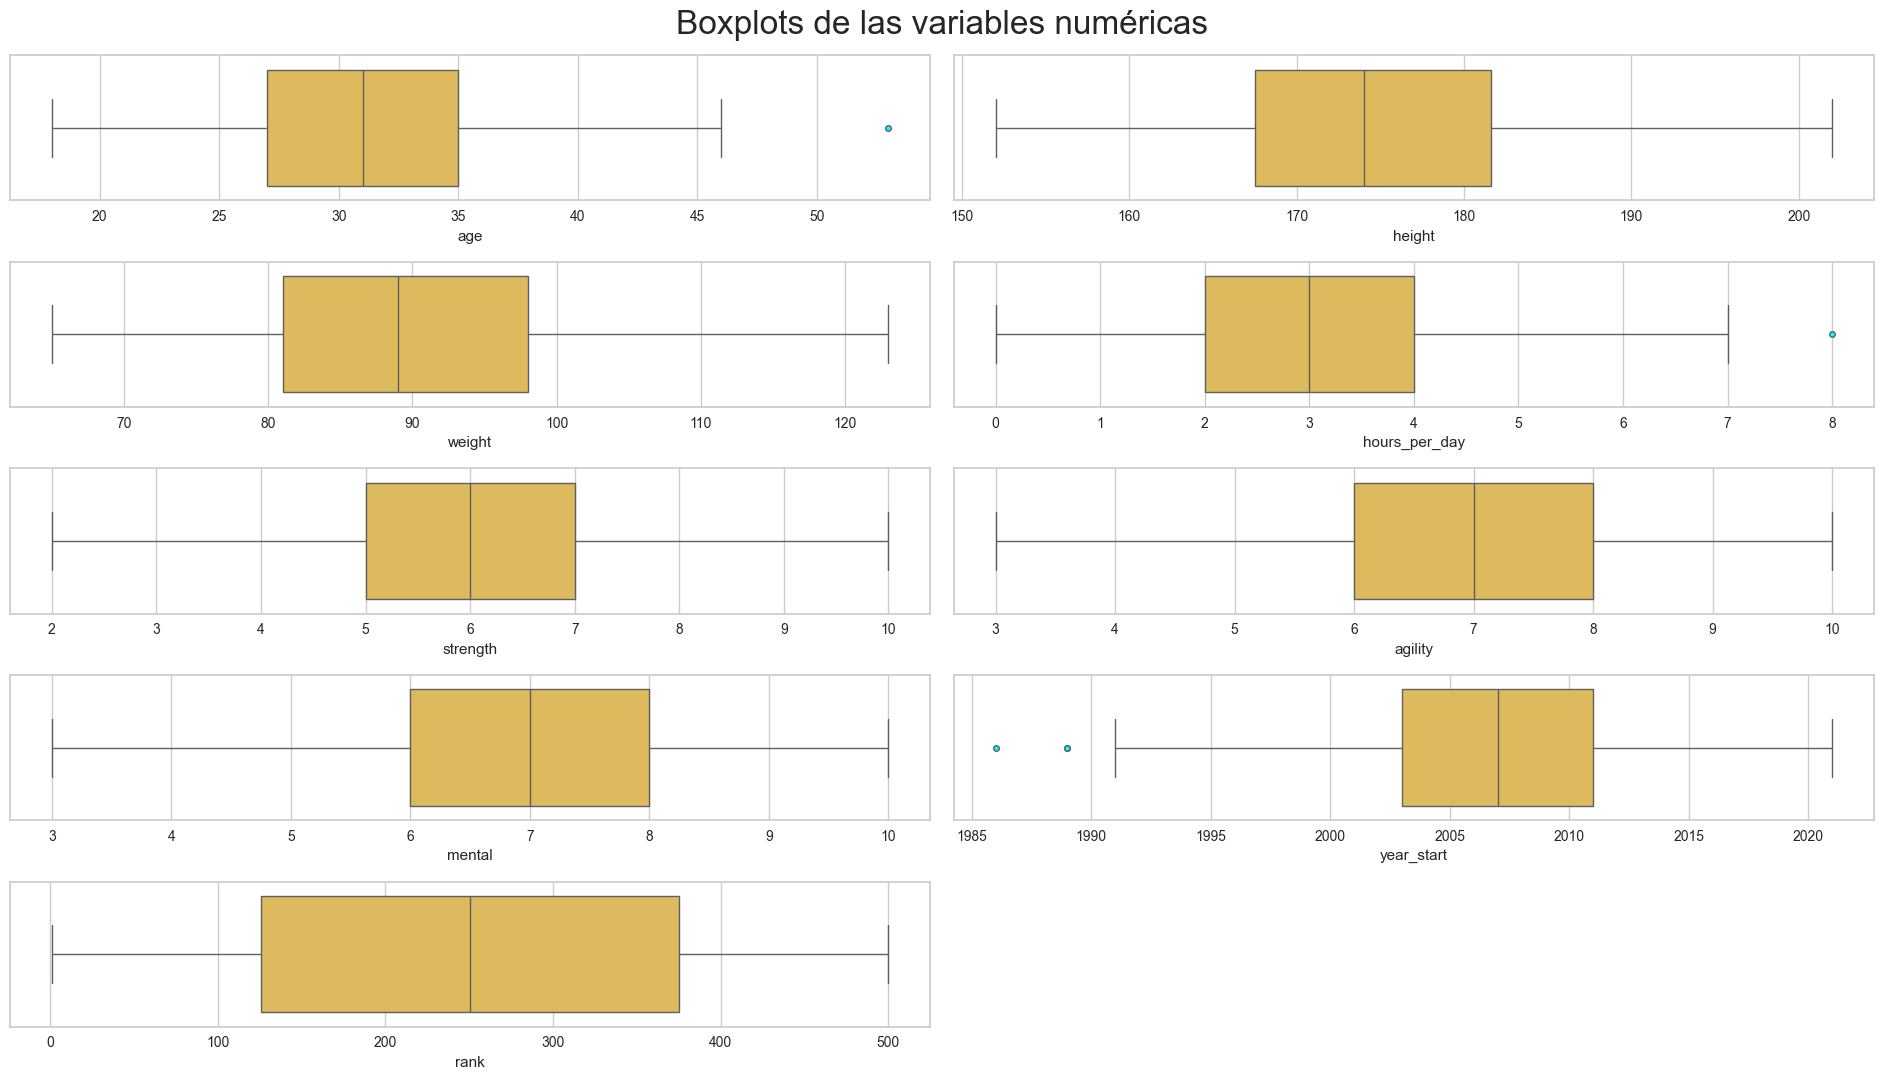

In [7]:
explorador.visualizar_numericas()

Para tener también una visión numérica más fina, se imprimen los estadísticos de distirbución de las mismas variables.

In [8]:
wrestling.select_dtypes(np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0


A partir de los gráficos y de la tabla anterior se presume que, aunque parece haber algún outlier univariante en cuanto a edad y año de comienzo de actividad, no se trata de errores. Todos los demás valores tienen rangos normales. De hecho, literalmente muestran valores normales ya que las formas de todas las distribuciones se asemejan a una normal a excepción de rangos, que son variables únicas del ranking de deportistas.

A continuación se muestra la distribución de las variables categóricas:

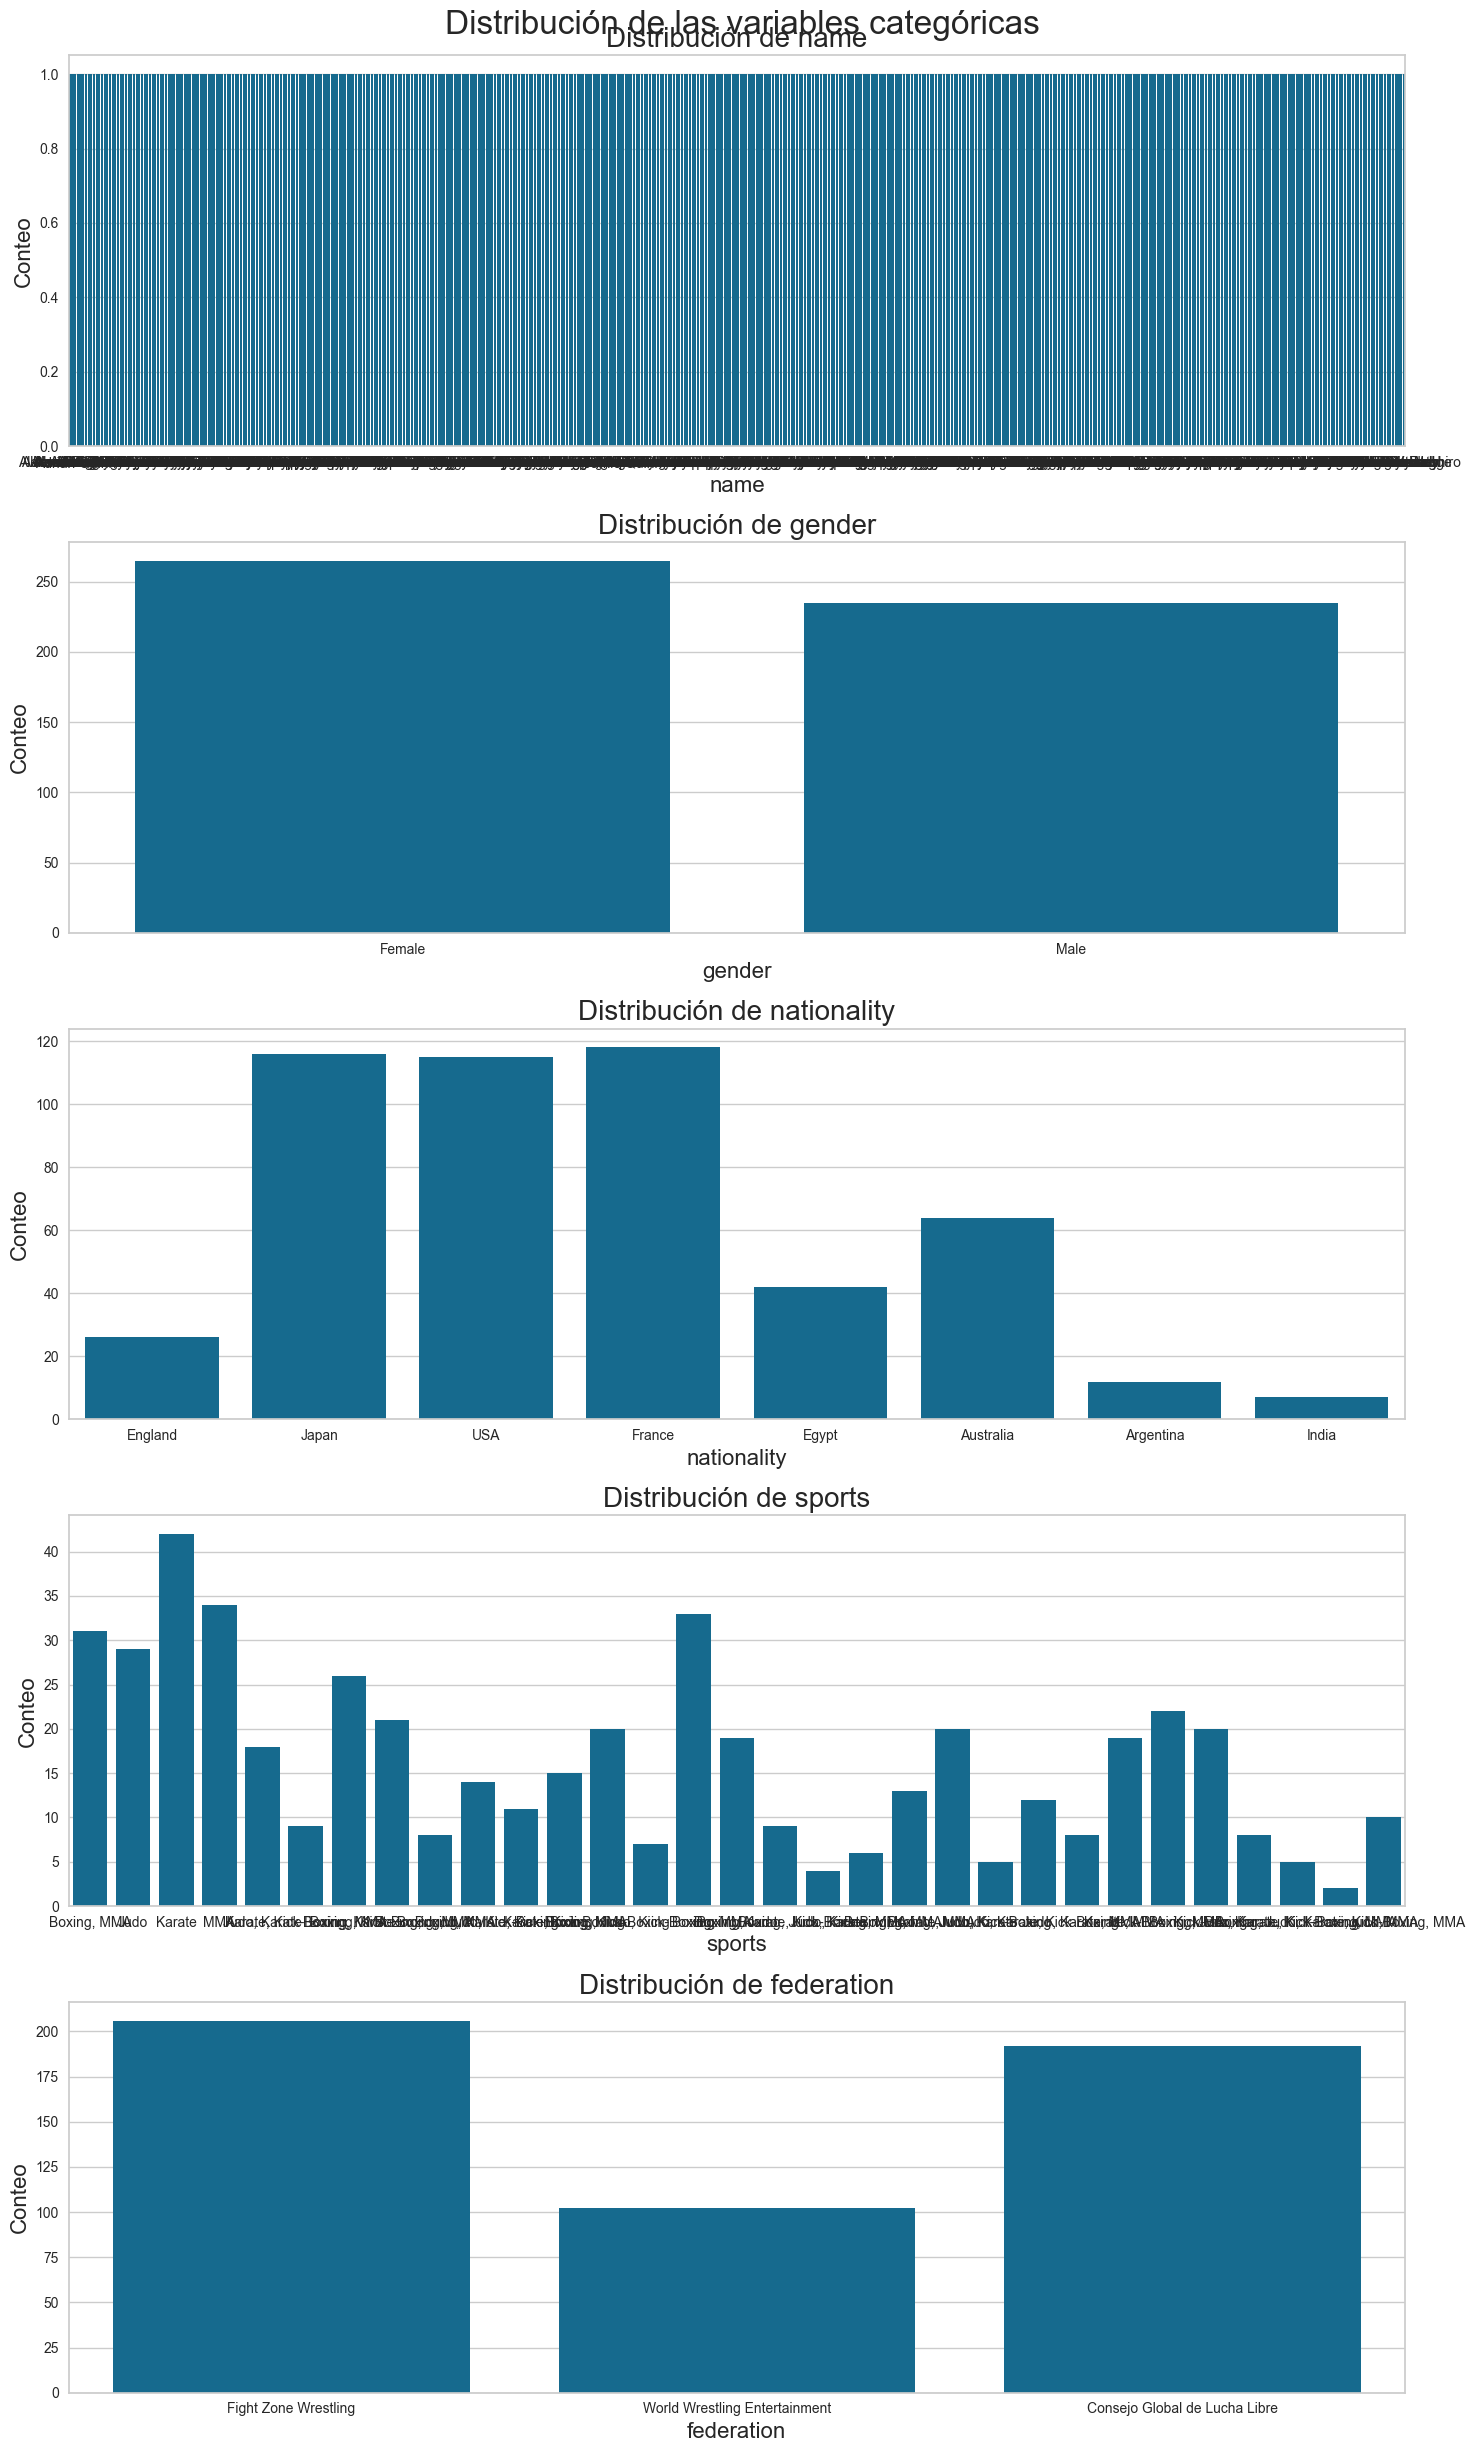

In [9]:
explorador.visualizar_categoricas()

Por supuesto, la variable name tiene alta cardinalidad, se puede obviar del análisis. En cuanto a las demás:
- Gender. Hay algo más de mujeres en el ranking. Es extraño que los deportistas estén mezclados por género.
- Nacionalidad. Las principales son USA, Japon y Francia.
- Federation. Hay 3 federaciones, las dos primeras muy igualadas y una minoritaria, 'World Wrestling Entertainment'
- Sports. En esta columna es imposible analizar nada, es necesario convertirla a dummy para normalizar los deportes que practica cada atleta ya que puede ser más de 1 a la vez.

In [10]:
sports_categories = ["Karate", "MMA", "Boxing", "Kick-Boxing", "Judo"]

wrestling_dummy = wrestling.copy()

for sport in sports_categories:
    wrestling_dummy[sport] = wrestling_dummy['sports'].str.contains(sport, case=False, na=False).astype(int).astype("object")

wrestling_dummy.drop(columns="sports", inplace=True, errors='ignore')
wrestling_dummy.sample(5)

,name,gender,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Karate,MMA,Boxing,Kick-Boxing,Judo
37,Barbara Slocum,Female,36,171.0,France,87,4,6,8,7,Fight Zone Wrestling,1998,70,1,1,1,0,0
145,Douglas Toelke,Male,22,172.5,Australia,89,2,7,7,8,Consejo Global de Lucha Libre,2020,150,0,1,1,1,0
210,Janet Stillwagon,Female,42,169.0,Japan,83,5,3,8,7,Consejo Global de Lucha Libre,1994,183,1,1,0,0,1
207,Jamie Quinn,Female,37,160.5,Egypt,74,3,3,9,7,Consejo Global de Lucha Libre,1999,197,1,1,1,0,0
479,Vickie Smith,Female,25,170.0,India,84,3,6,7,6,World Wrestling Entertainment,2012,386,0,0,1,0,0


Imprimiendo ahora las categorías de nuevo y dejando fuera el nombre:

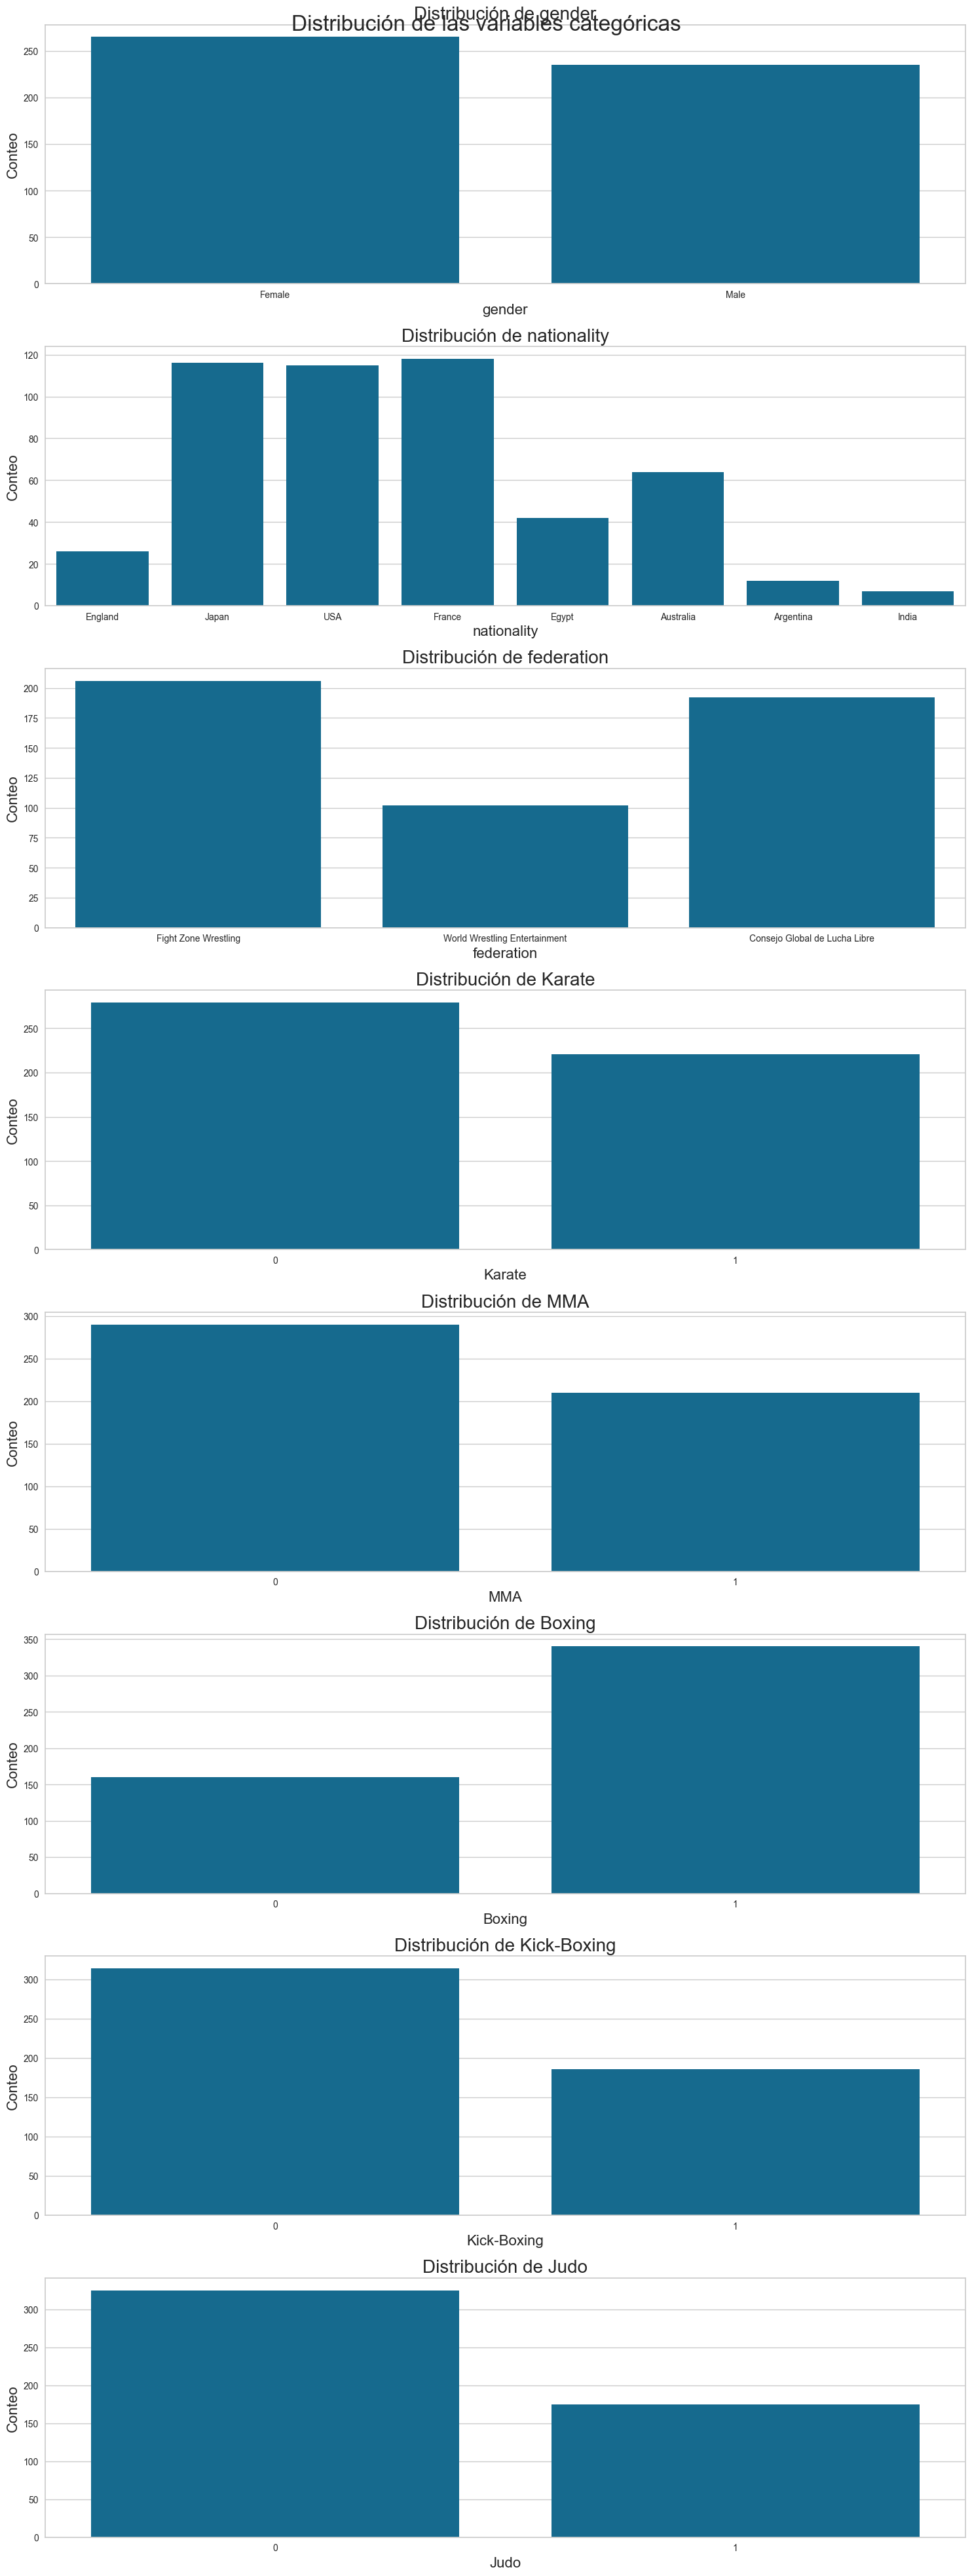

In [11]:
explorador = sc.Exploracion(wrestling_dummy.drop(columns=['name']))
explorador.visualizar_categoricas()

Aunque se trata de una federacion de wrestling, la mayoría de deportistas practican deportes de golpeo (Boxeo, MMA, Karate), mientras que menos de la mitad practican Judo.

## 3.2 EDA multivariante

Es conveniente comprobar las relaciones entre variables:
- numericas vs. numericas: mediante pairplots, matrices de correlación
- categoricas vs. categoricas: mediante tablas de contingencia, mosaicplots, matrices de VCramer
- categoricas vs. numericas : mediante gráficos de barras y de distribución con hue.

### 3.2.1 numericas vs numericas

Empecemos por la matriz de correlación:

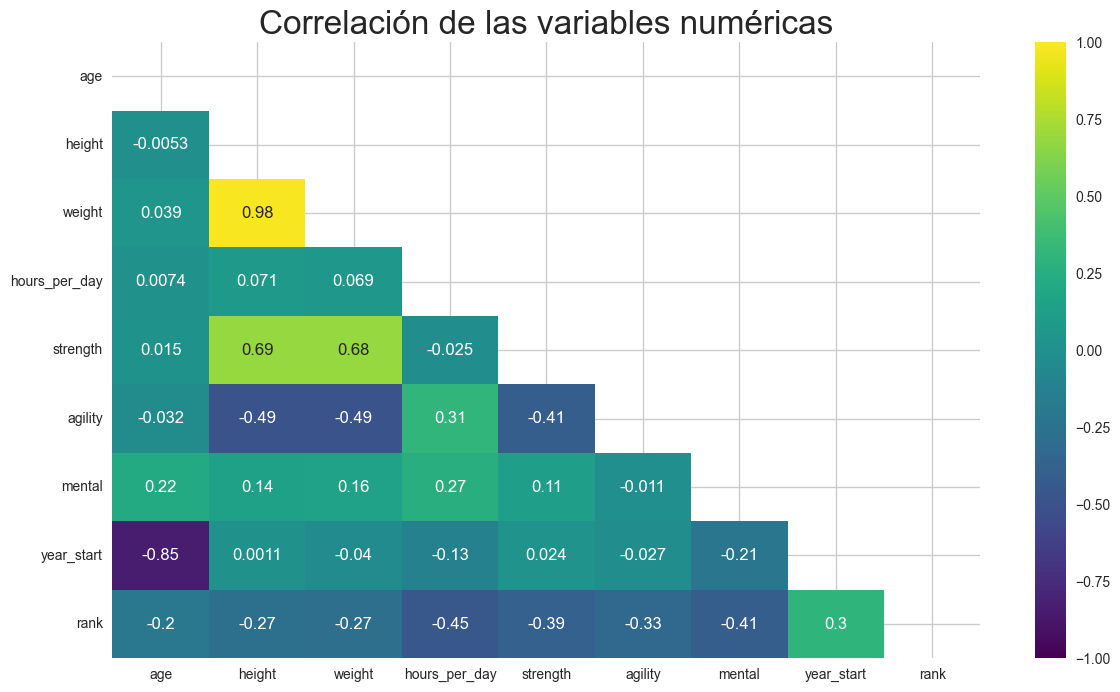

In [12]:
explorador.correlacion(metodo="spearman")

Para estos atletas, de alguna manera el peso y la altura son prácticamente una función lineal la una de la otra. La fuerza, aunque numérica discreta, guarda una relación lineal moderadamente fuerte con la altura y el peso. 

Lo contrario ocurre con la agilidad, que disminuye conforme aumenta la altura o el peso. Sin embargo, muestra una correlacion positiva débil a moderada con el número de horas de entrenamiento diario. La fuerza, se correlaciona con ella negativamente de forma moderada, de manera que alguien más fuerte suele ser más lento.

El aspecto mental se correlaciona positivamente, en mayor o menor medida de forma positiva con todos los aspectos; edad, peso/altura, entrenamiento y fuerza. Sin embargo, la agilidad no guarda ninguna correlacion con la confianza y la fortaleza mentales.

El año de comienzo está obviamente muy ligado a la edad. En la mayoría de casos, la gente de mas edad ha comenzado antes, y los jovenes no pueden empezar antes de haber nacido.

El rango disminuye en mayor o menor medida con todas las variables, pero sobretodo con el aspecto mental y las horas de entrenamiento. Esto significa que mejora con todos estos aspectos. Por otro lado sin embargo, el rango aumenta (empeora) con los años.

Para tener una idea visual de como se interrelacionan estas variables, se puede inspeccionar el pairplot:

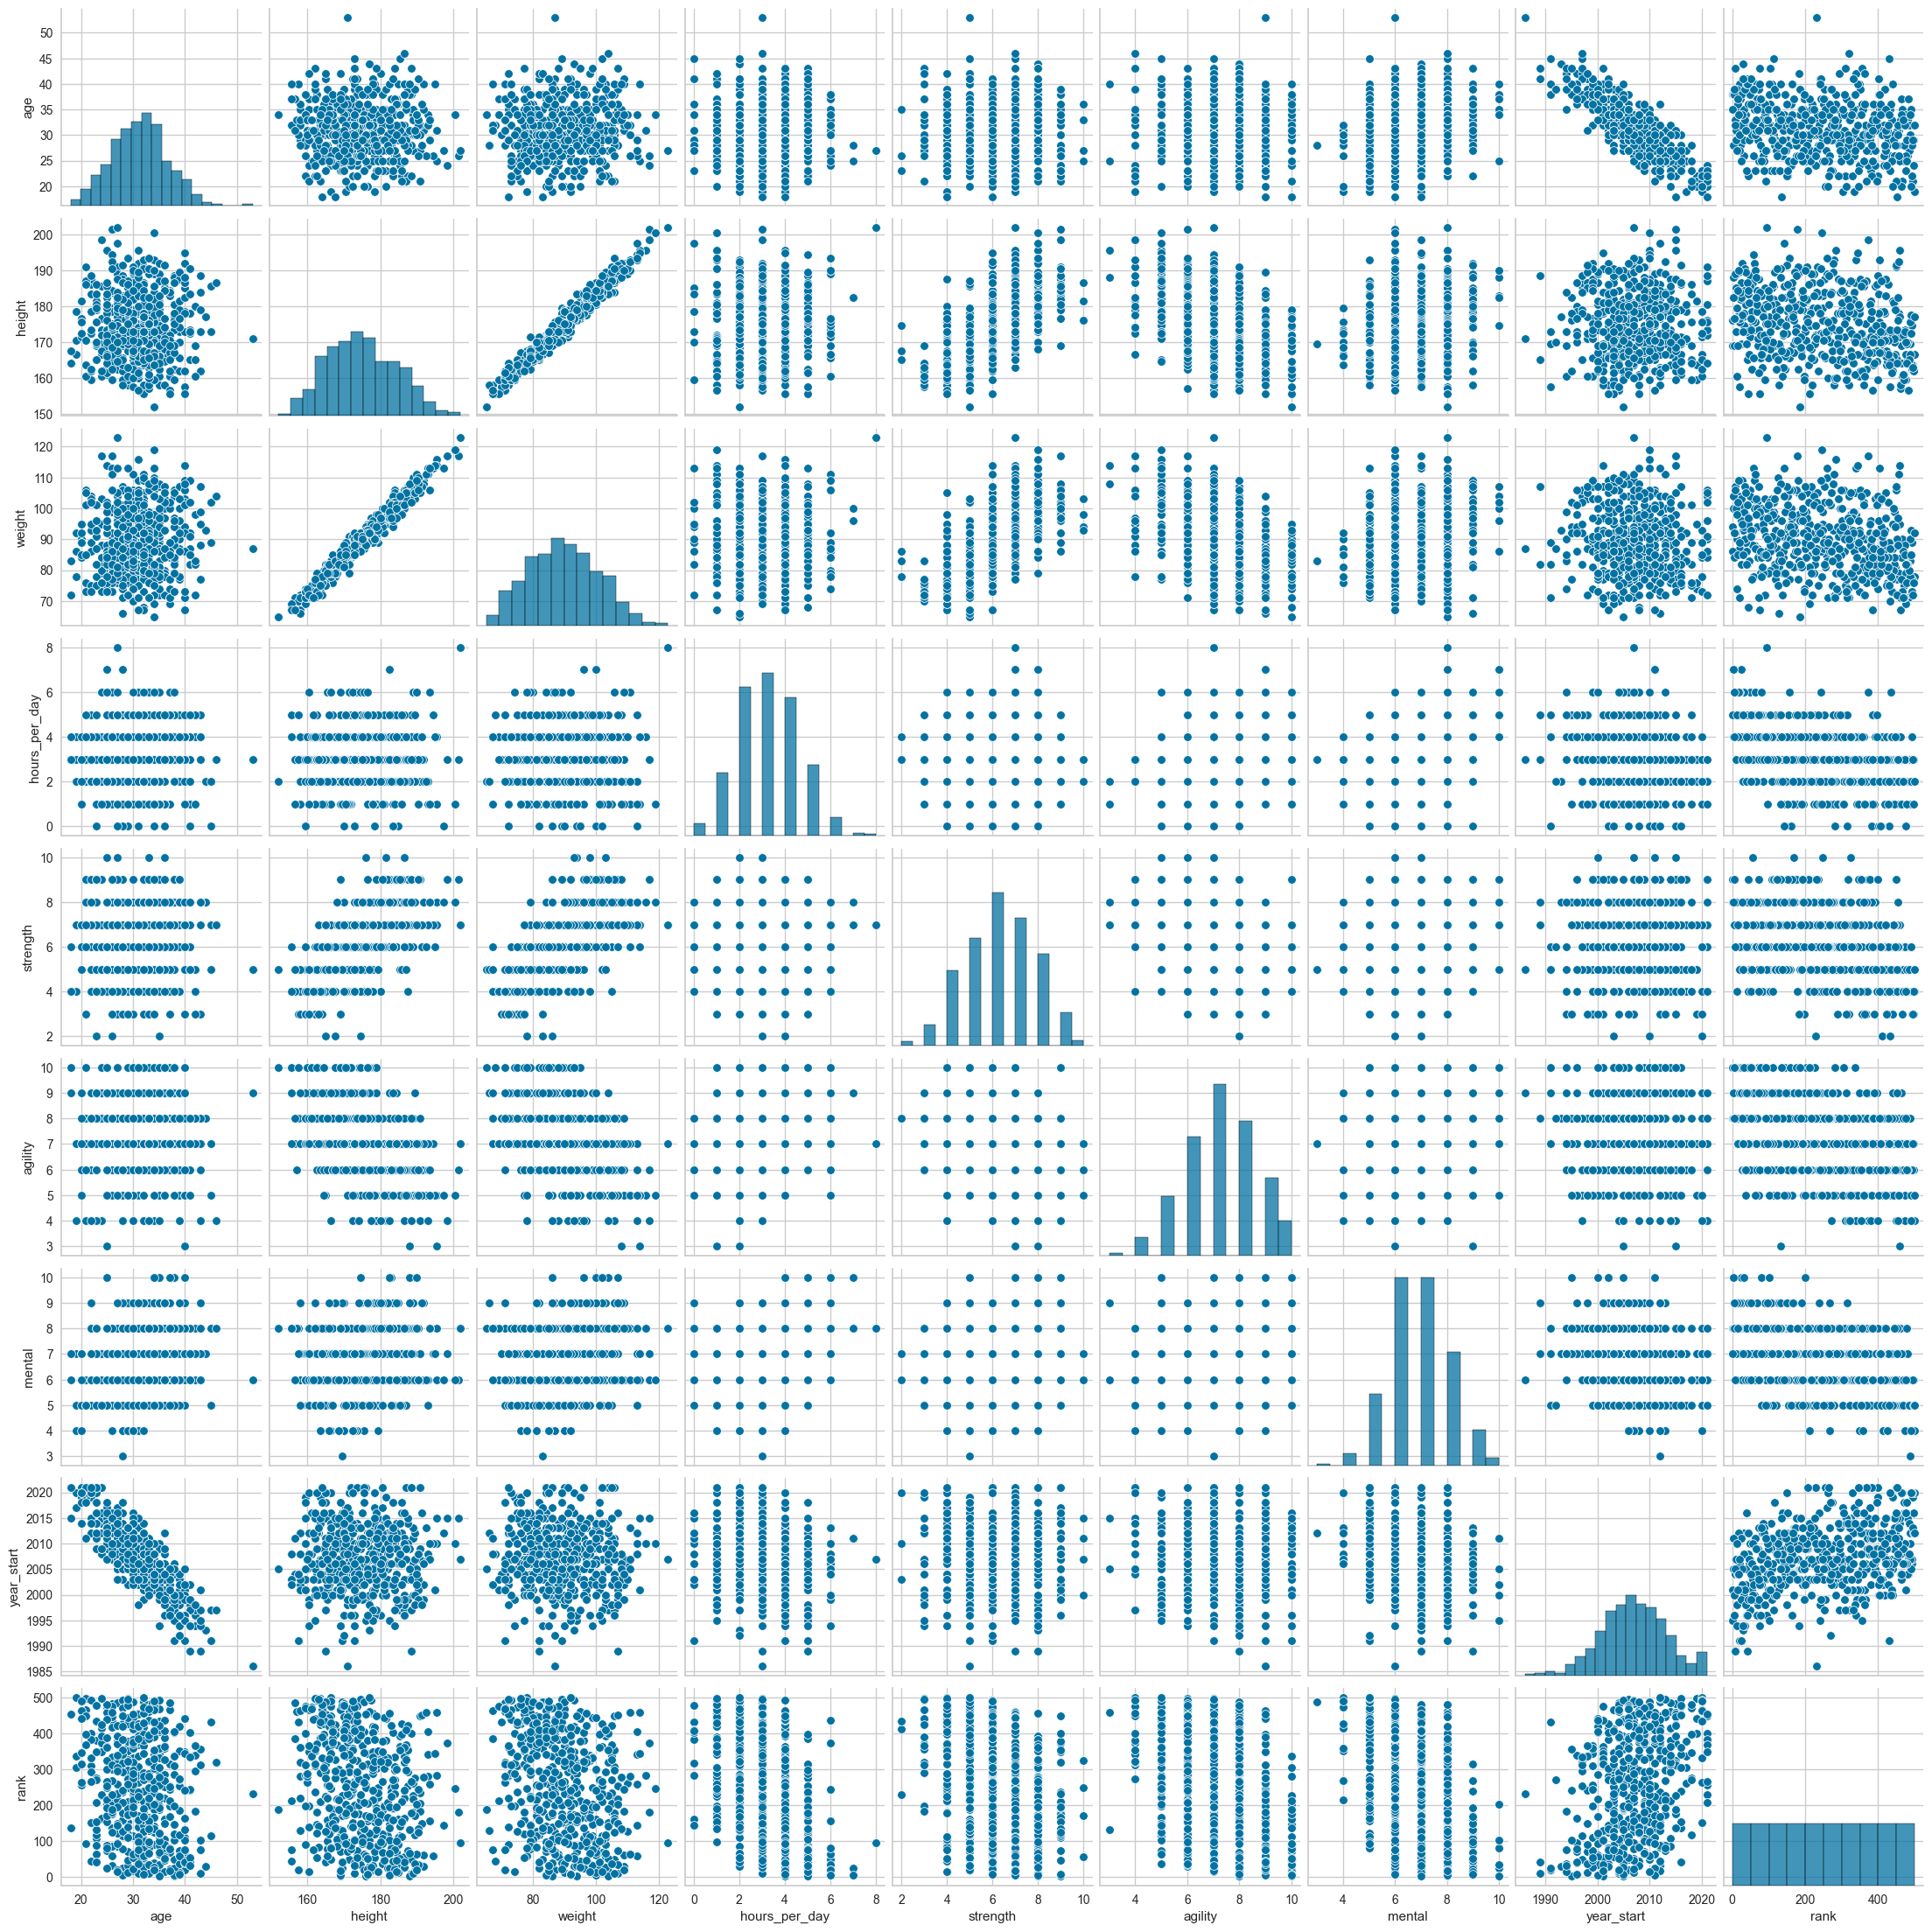

In [13]:
sns.pairplot(wrestling)

### 3.2.2 Categoricas vs. categoricas

<Axes: >

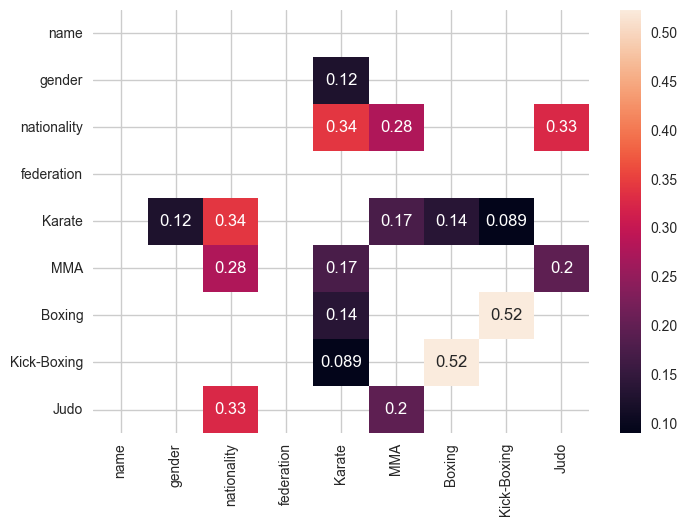

In [14]:
categorical = wrestling_dummy.select_dtypes("object").columns

cramers = am.CramersV(correction=True)

cramers_coeff_matrix, p_value_matrix = cramers.fit_transform(wrestling_dummy[categorical].astype("category"))

sns.heatmap(cramers_coeff_matrix[p_value_matrix < 0.05], annot=True)

La unica asociacion estadísticamente significativa categorica vs categorica es la de cada uno de los tipos de deporte con nacionalidad, entre ellos mismos y uno muy débil con el género.

Los efectos con nacionalidad son; Karate, MMA y Judo.

Entre ellos son Boxing y Kick-Boxing.

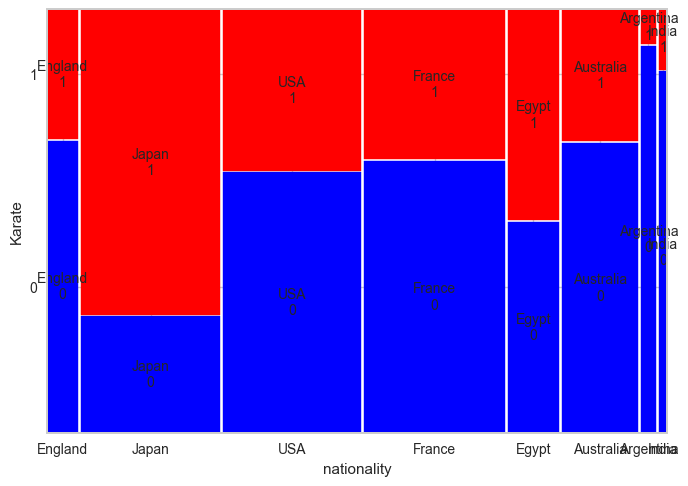

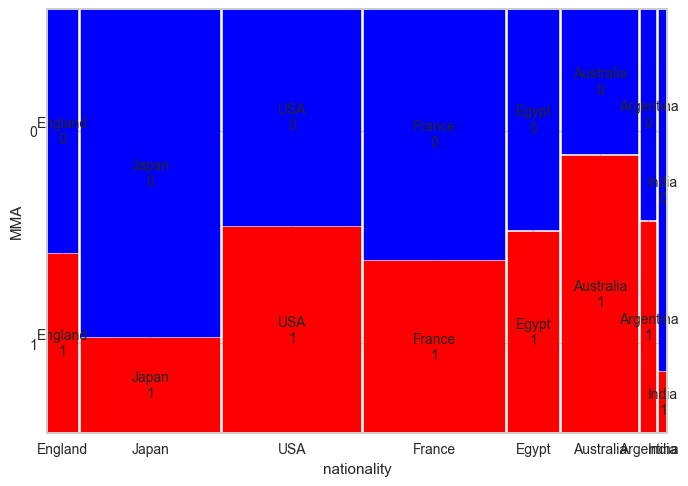

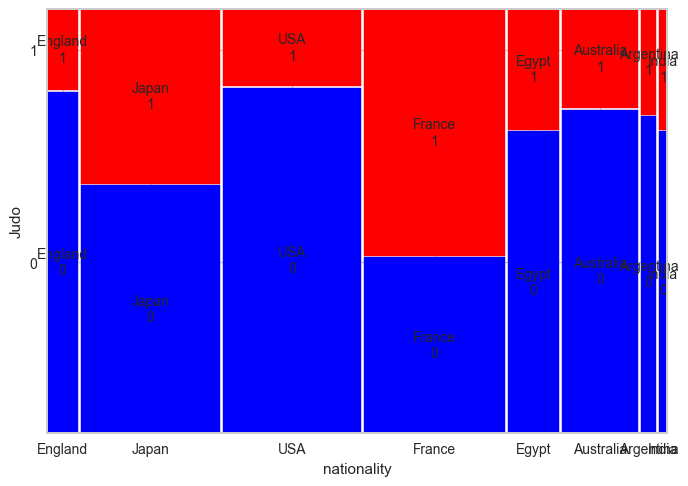

In [15]:
color_mapping = {
   "0": "blue",  
    "1": "red"    
}

for sport in ["Karate", "MMA", "Judo"]:
    fig, _ = se.mosaic(wrestling_dummy, ["nationality", sport], properties=se.custom_properties(color_mapping))

    # Set axis labels using the figure's axis
    fig.axes[0].set_xlabel("nationality")
    fig.axes[0].set_ylabel(sport);

Independientemente de los ejes verticales que cambian de orden, se observan diferencias entre el tipo de deportes practicado por pada país en proporcion.

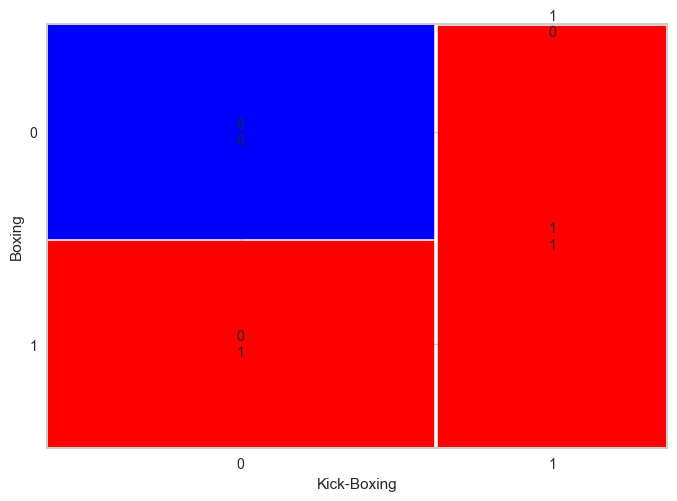

In [16]:
fig, _ = se.mosaic(wrestling_dummy, ["Kick-Boxing", "Boxing"], properties=se.custom_properties(color_mapping))

# hay problemas para usar la API de matplotlib para los ejes
fig.axes[0].set_xlabel("Kick-Boxing")
fig.axes[0].set_ylabel("Boxing");

Todos los atletas que practican kick-boxing, practican boxeo.

### 3.2.3 Categóricas vs numéricas

[Por alguna razón no consigo filtrar para enseñarlo]

In [17]:
coefficients = pd.DataFrame()
p_values = pd.DataFrame()
for cat_var in categorical:
    df_cat = se.calculate_rank_biserial(df=wrestling_dummy,features=wrestling_dummy.select_dtypes(np.number).columns, target=cat_var)
    df_cat.columns = [f"{cat_var}-{col}" for col in df_cat.columns]

    coefficients = pd.concat([coefficients,df_cat.iloc[:,0]], axis=1)
    p_values = pd.concat([p_values,df_cat.iloc[:,1]], axis=1)

coefficients.dropna(axis=1, how='all', inplace=True)
p_values.dropna(axis=1, how='all', inplace=True)

Habilidades de los distintos atletas según deporte que practican:

## 3.3 Inspección de outliers multivariantes

In [18]:
gestor_outliers = so.GestionOutliersMultivariados(dataframe=wrestling_dummy)

wrestling_dummy_outliers = gestor_outliers.detectar_outliers_lof(n_neighbors=25, contaminacion=0.05)
wrestling_dummy_outliers[wrestling_dummy_outliers["outlier"]==-1].sample(5)

,name,gender,age,height,nationality,weight,hours_per_day,strength,agility,mental,federation,year_start,rank,Karate,MMA,Boxing,Kick-Boxing,Judo,outlier
170,Fernando Blocker,Male,25,195.5,France,114,1,7,3,6,World Wrestling Entertainment,2015,459,0,0,1,0,0,-1
213,Jason Stewart,Male,28,191.5,USA,107,3,6,6,6,Consejo Global de Lucha Libre,2016,450,1,0,1,0,0,-1
295,Lolita Pennington,Female,34,152.0,Japan,65,2,5,10,8,World Wrestling Entertainment,2005,186,1,0,0,0,0,-1
50,Bob Stacy,Male,27,202.0,England,123,8,7,7,8,Fight Zone Wrestling,2007,95,0,0,1,1,1,-1
155,Edward Manchester,Male,21,191.0,Japan,106,3,9,4,6,Fight Zone Wrestling,2021,449,0,0,1,0,0,-1


Aunque se han etiquetado los outliers, existen muchas razones por las que cada uno de estos regístros puede considerarse como tal. Así que lo más lógico se considera seguir adelante con la clusterizacion, ya que si existen outliers el propio método cluster los debería separar.

# 4. Clustering

## 4.1 Preprocesado

### 4.1.1 Encoding

La elección de encoding es irrelevante, ya que en este caso no hay características que aprender y no debería impactar en el modelo siempre y cuando se aplique bien el escalado.

Dado que se va a tratar de hacer sugerencias en cuanto a planes de entrenamiento, estos deberían basarse en características físicas como la edad, el peso/altura, fuerza, volumen de entrenamiento, etc y el deporte que practiquen. Así que se excluyen: Nombre, nacionalidad, año de comienzo y federación.

In [19]:
X = wrestling_dummy.drop(columns=["name","nationality","federation","year_start"])

In [20]:
encoder = OrdinalEncoder()

X[["gender"]] = encoder.fit_transform(X[["gender"]])
X.sample(5)

,gender,age,height,weight,hours_per_day,strength,agility,mental,rank,Karate,MMA,Boxing,Kick-Boxing,Judo
394,1.0,33,176.0,93,3,10,6,6,247,1,0,0,0,0
56,0.0,27,172.5,85,4,6,8,7,257,1,0,1,0,1
488,0.0,42,160.5,72,1,3,7,7,364,0,1,0,0,0
215,0.0,36,168.0,79,2,7,8,7,284,1,0,0,0,0
256,1.0,37,184.0,102,5,7,6,7,253,0,0,1,0,1


### 4.1.2 Escalado

In [21]:
scaler = RobustScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,gender,age,height,weight,hours_per_day,strength,agility,mental,rank,Karate,MMA,Boxing,Kick-Boxing,Judo
0,0.0,1.250,-0.637168,-0.411765,0.0,0.5,0.5,0.0,-0.835671,0.0,1.0,0.0,0.0,0.0
1,1.0,0.625,0.778761,0.647059,-1.5,1.0,-1.0,1.0,-0.358717,0.0,0.0,-1.0,0.0,1.0
2,1.0,-0.250,0.318584,0.235294,0.5,1.0,0.5,0.0,-0.390782,1.0,0.0,-1.0,0.0,0.0
3,1.0,1.000,0.955752,1.058824,0.0,0.5,-0.5,0.5,0.006012,0.0,0.0,-1.0,0.0,1.0
4,0.0,-0.250,-1.132743,-1.000000,-1.0,-0.5,0.0,0.0,0.438878,0.0,1.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.0,0.375,0.814159,0.882353,-0.5,1.5,-0.5,-1.0,0.410822,0.0,0.0,-1.0,0.0,1.0
496,0.0,0.000,-0.884956,-1.058824,1.0,-1.0,1.0,-0.5,-0.707415,1.0,1.0,0.0,1.0,1.0
497,1.0,-1.125,1.026549,0.764706,0.0,1.0,0.5,0.0,0.058116,0.0,0.0,0.0,1.0,0.0
498,0.0,0.125,0.212389,0.176471,-0.5,-0.5,-1.0,-1.0,0.995992,0.0,0.0,-1.0,0.0,1.0


## 4.2 Clustering

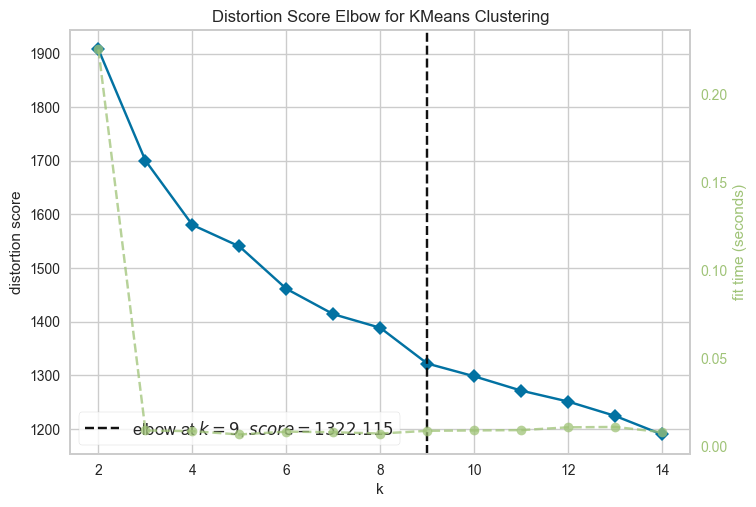

In [22]:
# instanciamos la clase de clustering
modelos = sc.Clustering(X_scaled)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans(metric="distortion")

In [29]:
wrestling_dummy_kmeans, labels = modelos.modelo_kmeans(X_scaled, num_clusters=2)
wrestling_dummy_kmeans.head(5)

,gender,age,height,weight,hours_per_day,strength,agility,mental,rank,Karate,MMA,Boxing,Kick-Boxing,Judo,clusters_kmeans
0,0.0,1.250,-0.637168,-0.411765,0.0,0.5,0.5,0.0,-0.835671,0.0,1.0,0.0,0.0,0.0,0
1,1.0,0.625,0.778761,0.647059,-1.5,1.0,-1.0,1.0,-0.358717,0.0,0.0,-1.0,0.0,1.0,1
2,1.0,-0.250,0.318584,0.235294,0.5,1.0,0.5,0.0,-0.390782,1.0,0.0,-1.0,0.0,0.0,1
3,1.0,1.000,0.955752,1.058824,0.0,0.5,-0.5,0.5,0.006012,0.0,0.0,-1.0,0.0,1.0,1
4,0.0,-0.250,-1.132743,-1.000000,-1.0,-0.5,0.0,0.0,0.438878,0.0,1.0,-1.0,0.0,0.0,0


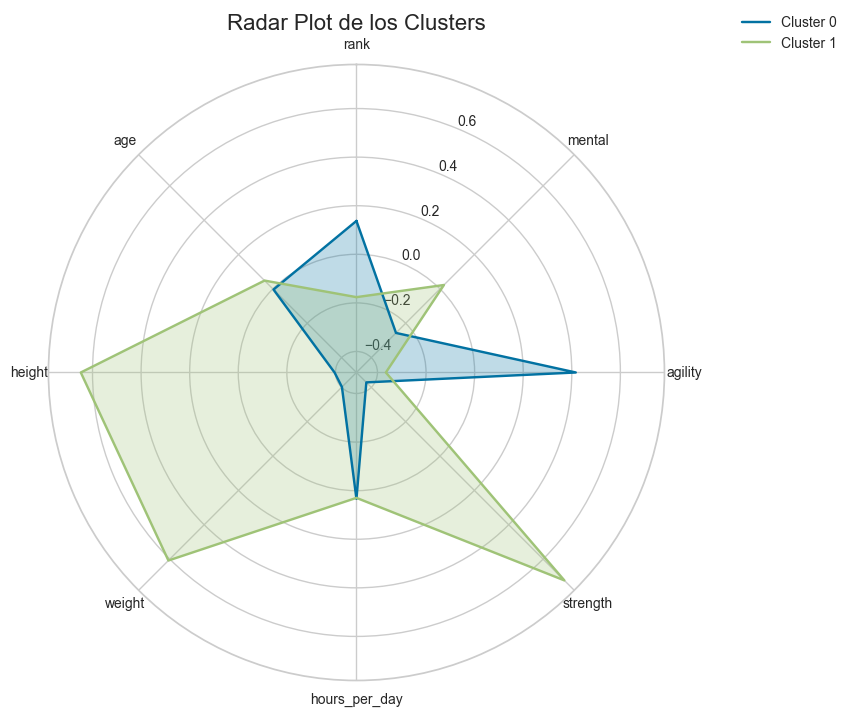

In [30]:
# Supongamos que 'df' es tu DataFrame
# Variables que deseas incluir en el radar plot
variables = ['rank', 'mental', 'agility', 'strength', 'hours_per_day', 
             'weight', 'height', 'age']

# Agrupar por cluster y calcular la media
cluster_means = wrestling_dummy_kmeans.groupby('clusters_kmeans')[variables].mean()

# Repetir la primera columna al final para cerrar el radar
cluster_means = pd.concat([cluster_means, cluster_means.iloc[:, 0:1]], axis=1)

# Crear los ángulos para el radar plot
num_vars = len(variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Crear el radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar un gráfico para cada cluster
for i, row in cluster_means.iterrows():
    ax.plot(angles, row, label=f'Cluster {i}')
    ax.fill(angles, row, alpha=0.25)

# Configurar etiquetas de los ejes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Plot de los Clusters', size=16)
plt.show()

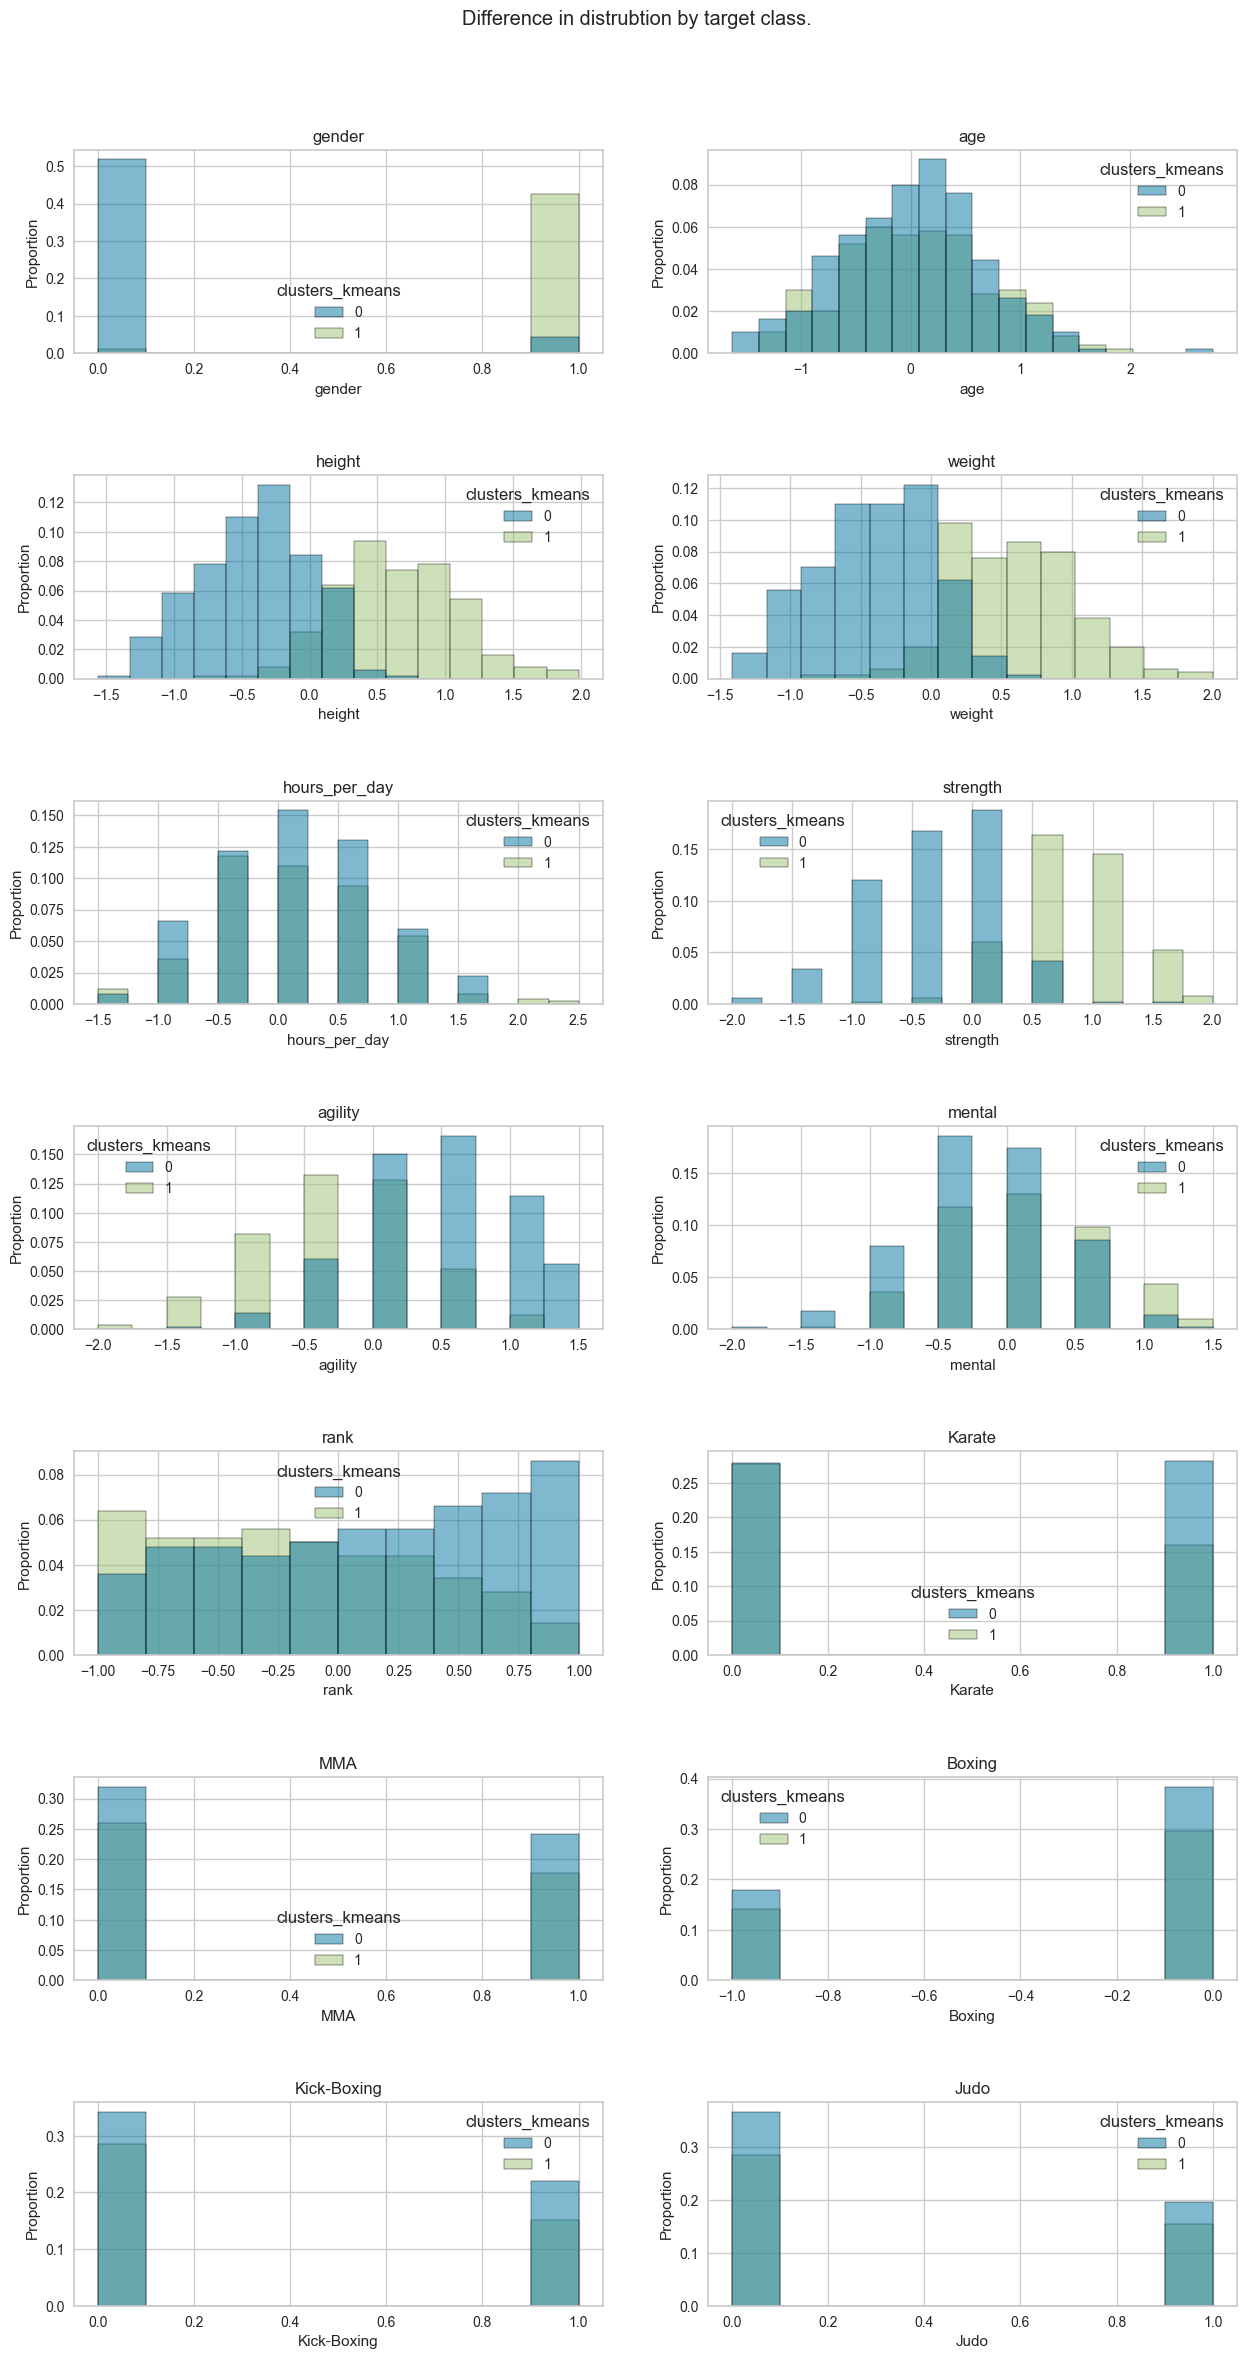

In [31]:
plot_df = wrestling_dummy_kmeans[X.columns.to_list() + ["clusters_kmeans"]]
color_mapping = {
   0: "blue",  
    1: "red"    
}


se.plot_relationships_categorical_target(plot_df, target="clusters_kmeans", cat_type="mosaic", mapping={})

In [ ]:
numerical_columns = wrestling_dummy_kmeans[X.columns.to_list() + ["clusters_kmeans"]].select_dtypes(np.number)

n_cols = math.ceil(len(numerical_columns) / 2)
n_rows = 2
fig, axes = plt.subplot(n_rows, n_cols, figsize=(15,10))
axes = axes.flat

for ax, column in zip(axes, numerical_columns):
    sns.barplot(
        data=wrestling_dummy_kmeans,
        x="clusters_kmeans",
        y=column,
        hue="clusters_kmeans",
        palette="coolwarm"
    )

AttributeError: module 'matplotlib' has no attribute 'subplot'